The data shows the information of American colleges and universities in 1995, the detail as below. And we would like to classify good colleges and universities. 

[ACollege1995.csv] Columns:<br>
app - No. of applicants received<br>
acc - No. of applicants accepted<br>
enrol - No. of new students enrolled<br>
ftime - No. of full-time undergraduates<br>
ptime - No. of part-time undergraduate<br>
instate - In-state tuition<br>
outstate - Out-state tuition<br>
rbcost - Room and board cost<br>
bkcost - Estimated book cost<br>
phd - % of faculty with Ph.D.<br>
sfratio - Student/faculty ratio<br>
expend - Instructional expenditure per student<br>
grad - Graduation rate<br>
top10 - % new students from top 10% of high school class

In [1]:
data = read.csv('../ACollege1995.csv')

In [2]:
head(data)

app,acc,enrol,ftime,ptime,instate,outstate,rbcost,bkcost,phd,sfratio,expend,grad,top10
193,146,55,249,869,7560,7560,4120,800,76,11.9,10922,15,16
1852,1427,928,3885,4519,1742,5226,3590,650,67,10.0,11935,NA,NA
146,117,89,492,1849,1742,5226,4764,500,39,9.5,9584,39,4
2065,1598,1162,6209,10537,1742,5226,5120,580,48,13.7,8046,NA,NA
2817,1920,984,3958,305,1700,3400,2550,500,53,14.3,7043,40,NA
345,320,179,1367,578,5600,5600,3250,350,52,32.8,3971,55,NA


In [3]:
# Remove Null
data = data[complete.cases(data),]

In [4]:
head(data)

,app,acc,enrol,ftime,ptime,instate,outstate,rbcost,bkcost,phd,sfratio,expend,grad,top10
1,193,146,55,249,869,7560,7560,4120,800,76,11.9,10922,15,16
3,146,117,89,492,1849,1742,5226,4764,500,39,9.5,9584,39,4
7,1351,892,570,2385,331,2220,4440,3030,300,72,18.9,5883,51,18
9,7548,6791,3070,16262,1716,2100,6300,3933,600,85,16.7,6642,69,25
10,805,588,287,1376,207,11660,11660,4325,400,74,14.0,8649,72,67
12,608,520,127,538,126,8080,8080,3920,500,63,11.4,7703,44,26


In [5]:
# We are going to predict the good colleges and universities with 30%+ new students from top 10% high school class.
data$good = 0
data$good[data$top10 > 30] = 1
data$good = factor(data$good)

In [6]:
head(data)

,app,acc,enrol,ftime,ptime,instate,outstate,rbcost,bkcost,phd,sfratio,expend,grad,top10,good
1,193,146,55,249,869,7560,7560,4120,800,76,11.9,10922,15,16,0
3,146,117,89,492,1849,1742,5226,4764,500,39,9.5,9584,39,4,0
7,1351,892,570,2385,331,2220,4440,3030,300,72,18.9,5883,51,18,0
9,7548,6791,3070,16262,1716,2100,6300,3933,600,85,16.7,6642,69,25,0
10,805,588,287,1376,207,11660,11660,4325,400,74,14.0,8649,72,67,1
12,608,520,127,538,126,8080,8080,3920,500,63,11.4,7703,44,26,0


[1] 639  13
[1] 254  13


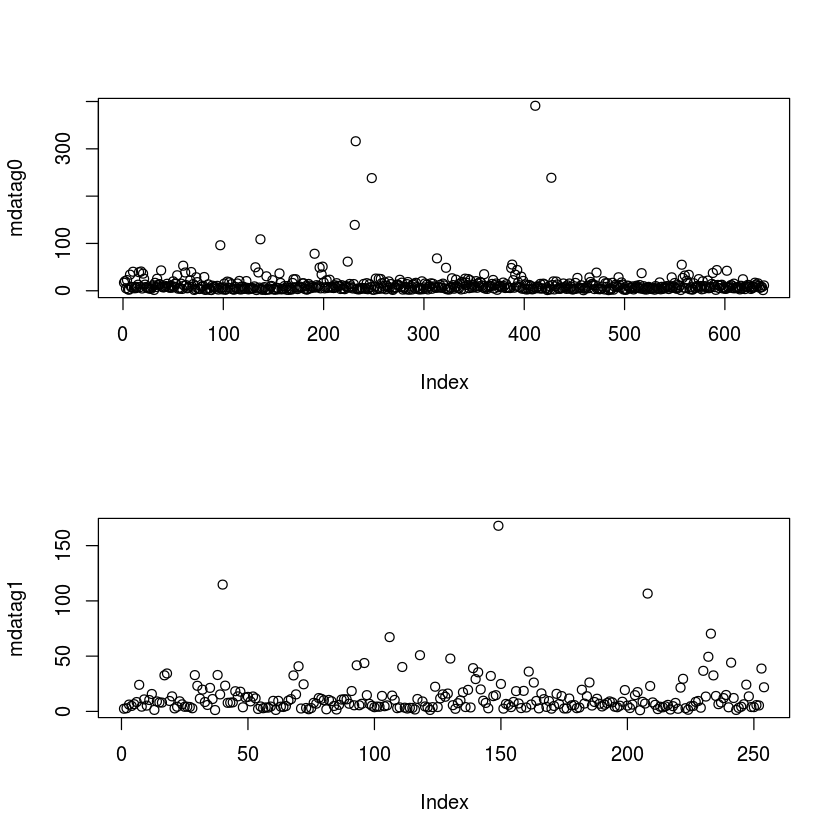

In [7]:
# Some models are sensitive to the outliers, let remove test by Mahalanobis Method
datag0 = data[data$good==0, 1:13]
print(dim(datag0))
datag1 = data[data$good==1, 1:13]
print(dim(datag1))

mdist<-function(x) {
   t<-as.matrix(x)
   m<-apply(t,2,mean)
   s<-var(t)
   mahalanobis(t,m,s)
}

mdatag0 = mdist(datag0)
mdatag1 = mdist(datag1)

par(mfrow=c(2,1))
plot(mdatag0)
plot(mdatag1)

In [8]:
# Use 99% chi-square distribution as the cut-off
cutoff = qchisq(0.99,df=13)

xdatag0 = datag0[mdatag0<cutoff,]
xdatag1 = datag1[mdatag1<cutoff,]

xdatag0$good = 0
xdatag1$good = 1

cat('Number of outliers in datag0:',dim(datag0)[1] - dim(xdatag0)[1],'\n')
cat('Number of outliers in datag1:',dim(datag1)[1] - dim(xdatag1)[1])

Number of outliers in datag0: 47 
Number of outliers in datag1: 27

In [9]:
# Combine and save the result
xdata = rbind(xdatag0, xdatag1)
dim(xdata)
write.table(xdata, file='../ACollege1995R.csv', sep=',', row.names=F)

[1] 819  14